In [1]:
import SciServer.SkyServer as SkyServer
import SciServer.CasJobs as CasJobs
import SciServer.SciDrive as SciDrive

In [5]:
import numpy as np
import scipy.misc as imsave
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [6]:
query="""
SELECT p.objId,p.ra,p.dec,p.petror90_r, p.expAB_r,
    p.dered_u as u, p.dered_g as g, p.dered_r as r, p.dered_i as i, 
    s.z, s.plate, s.mjd, s.fiberid, p.g as mag, n.sersic_n
FROM galaxy AS p
   JOIN SpecObj AS s ON s.bestobjid = p.objid
   JOIN nsatlas AS n ON n.mjd = s.mjd and n.fiberID = s.fiberID and n.plate = s.plate
WHERE p.petror90_r > 10
  and p.ra between 0 and 360
  and s.z between 0.02 and .1
  and p.g < 17
"""
newgals = CasJobs.executeQuery(query, "dr14")

print("SQL query returned " + str(len(newgals))+ " galaxies")


SQL query returned 41173 galaxies


In [11]:
query="""
SELECT
objid as objId, nvote,
p_el as elliptical,
p_cw as spiralclock, p_acw as spiralanticlock, p_edge as edgeon,
p_dk as dontknow, p_mg as merger, ra, dec
FROM ZooNoSpec
"""
#Then, query the database. The answer is a table that is being returned to a dataframe that we've named all_gals.
zoo_gals = CasJobs.executeQuery(query, "dr8")

print("SQL query finished.")
print("SQL query returned " + str(len(zoo_gals))+ " galaxies")

SQL query finished.
SQL query returned 225268 galaxies


In [15]:
gals_with_zoo =  pd.merge(zoo_gals, newgals, on='objId').dropna().reset_index()
number_of_gals = len(gals_with_zoo)
print(str(number_of_gals))


2440


In [7]:
newgals['red_color'] = newgals['u'] - newgals['g']

(0.5, 2.5)

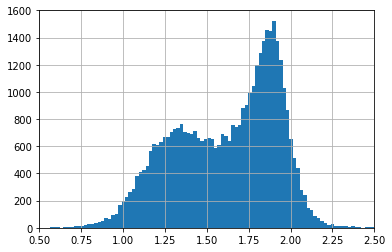

In [10]:

newgals['red_color'].hist(bins=1000)
plt.xlim(0.5,2.5)